<h1><center>K-Means Clustering</center></h1>

## Introduction

There are many models for **clustering** out there. In this notebook, we will be presenting the model that is considered one of the simplest models amongst them. Despite its simplicity, the **K-means** is vastly used for clustering in many data science applications, especially useful if you need to quickly discover insights from **unlabeled data**. In this notebook, you will learn how to use k-Means for customer segmentation.

Some real-world applications of k-means:
- Customer segmentation
- Understand what the visitors of a website are trying to accomplish
- Pattern recognition
- Machine learning
- Data compression


In this notebook we practice k-means clustering with 2 examples:
- k-means on a random generated dataset
- Using k-means for customer segmentation

In [1]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

In [2]:
np.random.seed(0)

In [3]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

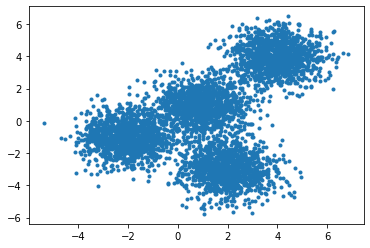

In [4]:
plt.scatter(X[:, 0], X[:, 1], marker='.')

In [5]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

In [6]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 3, 3, ..., 1, 0, 0])

In [8]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

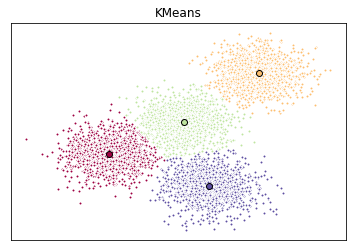

In [9]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()

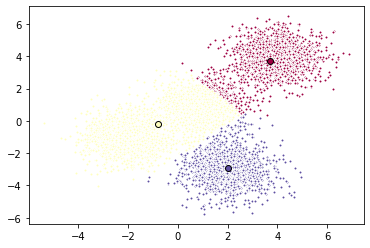

In [10]:
# write your code here
k_means3 = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means3.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
    my_members = (k_means3.labels_ == k)
    cluster_center = k_means3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
plt.show()

<h1 id="customer_segmentation_K_means">Customer Segmentation with K-Means</h1>
Imagine that you have a customer dataset, and you need to apply customer segmentation on this historical data.
Customer segmentation is the practice of partitioning a customer base into groups of individuals that have similar characteristics. It is a significant strategy as a business can target these specific groups of customers and effectively allocate marketing resources. For example, one group might contain customers who are high-profit and low-risk, that is, more likely to purchase products, or subscribe for a service. A business task is to retaining those customers. Another group might include customers from non-profit organizations. And so on.

Lets download the dataset. To download the data, we will use **`!wget`** to download it from IBM Object Storage.  
__Did you know?__ When it comes to Machine Learning, you will likely be working with large datasets. As a business, where can you host your data? IBM is offering a unique opportunity for businesses, with 10 Tb of IBM Cloud Object Storage: [Sign up now for free](http://cocl.us/ML0101EN-IBM-Offer-CC)

In [16]:
import pandas as pd

In [17]:
import pandas as pd
cust_df = pd.read_csv("Cust_Segmentation.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


<h2 id="pre_processing">Pre-processing</h2

As you can see, __Address__ in this dataset is a categorical variable. k-means algorithm isn't directly applicable to categorical variables because Euclidean distance function isn't really meaningful for discrete variables. So, lets drop this feature and run clustering.

In [18]:
df = cust_df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


#### Normalizing over the standard deviation
Now let's normalize the dataset. But why do we need normalization in the first place? Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. We use __StandardScaler()__ to normalize our dataset.

In [19]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.77044435,  0.28909788, -0.35270806, ..., -0.60637995,
        -0.59096247, -0.58657748],
       [ 1.51866435, -0.78665054,  2.65168467, ...,  1.56898311,
        -0.59096247,  0.36265022],
       [-0.22718231,  0.28909788,  0.24817049, ...,  0.83340898,
         1.69215483,  1.54553397],
       ...,
       [-1.22480897,  2.44059473, -1.25402587, ...,  0.04424998,
         1.69215483,  3.37097186],
       [-0.35188564, -0.78665054,  0.54860976, ..., -0.72116118,
        -0.59096247, -1.08309659],
       [ 2.14218101, -0.78665054,  1.1494883 , ...,  0.17455864,
        -0.59096247, -0.25069691]])

<h2 id="modeling">Modeling</h2>

In our example (if we didn't have access to the k-means algorithm), it would be the same as guessing that each customer group would have certain age, income, education, etc, with multiple tests and experiments. However, using the K-means clustering we can do all this process much easier.

Lets apply k-means on our dataset, and take look at cluster labels.

In [20]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 2 2 0 1 2 2 2 2 0 0 0 0 0 0 0 2 2 0 2 0 2 2 0 0 0 0 0 0 2 0 1 0 0 0 2 0
 0 2 0 0 0 2 0 2 0 2 2 0 0 2 0 0 0 2 2 2 0 0 0 0 1 2 2 1 2 0 0 2 0 0 0 0 0
 0 0 0 2 0 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0
 0 0 2 0 0 0 0 0 0 2 2 2 0 2 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 2 0 0 0 2
 0 0 0 0 0 0 2 0 2 1 0 2 0 0 0 0 1 2 0 0 2 0 0 2 2 0 2 0 0 0 0 2 0 0 2 0 0
 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 2 0 0 0 0 0 2 0 2 0 2 0 0 0 0 0 0 0 2 0 0
 2 0 2 2 0 2 2 0 0 0 0 0 0 0 0 2 2 2 0 0 0 2 0 0 0 2 0 0 0 0 0 2 0 2 0 2 0
 0 2 0 2 2 0 0 0 0 0 2 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 2 0 0 1 0 0 0 2 0 2
 2 2 2 0 0 2 0 0 0 0 0 0 0 0 0 1 0 2 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 2 0 2 0
 2 0 0 0 0 0 2 2 2 0 0 0 0 0 0 2 0 0 2 0 0 0 2 0 0 0 0 1 0 0 2 0 0 2 0 0 0
 1 0 0 0 2 0 1 0 0 0 0 2 0 2 2 2 0 2 2 0 2 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0
 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 2 2 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 2 0 0 2 0 2 0 1 0 0 0 2 0 2 0 0 0 2 0 0 1 0 0 0 0 0 0 0 2 2 0 0 0 0
 0 0 0 2 0 0 0 2 0 0 0 0 

<h2 id="insights">Insights</h2>
We assign the labels to each row in dataframe.

In [21]:
df["Clus_km"] = labels
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,2
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


We can easily check the centroid values by averaging the features in each cluster.

In [22]:
df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,444.371542,32.326087,1.654150,5.749012,29.278656,0.935885,1.937723,0.288000,9.996047
1,378.000000,44.823529,2.823529,19.000000,206.647059,5.656059,11.496588,0.235294,8.435294
2,409.282609,40.760870,1.842391,14.510870,75.201087,2.910978,5.384701,0.191257,11.372283


Now, lets look at the distribution of customers based on their age and income:

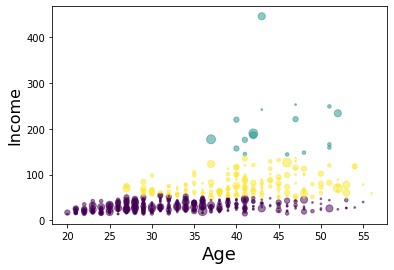

In [23]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

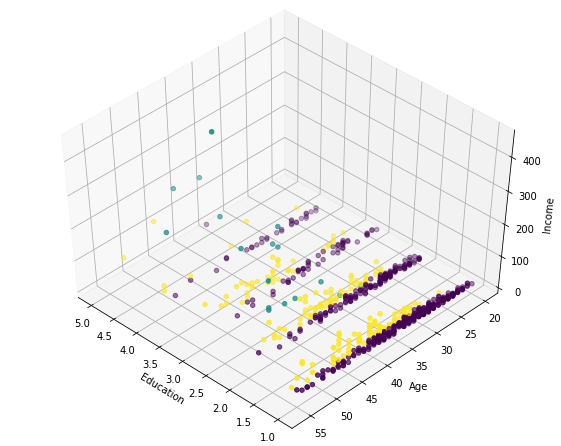

In [24]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))

k-means will partition your customers into mutually exclusive groups, for example, into 3 clusters. The customers in each cluster are similar to each other demographically.
Now we can create a profile for each group, considering the common characteristics of each cluster. 
For example, the 3 clusters can be:

- AFFLUENT, EDUCATED AND OLD AGED
- MIDDLE AGED AND MIDDLE INCOME
- YOUNG AND LOW INCOME